In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

In [4]:
# load dataset
df = pd.read_csv(r'..\datasets\processed_product_data.csv')

In [5]:
# Drop non-numeric/unnecessary columns
df = df.drop(columns=["ProductName"])

In [6]:
# Features and target
X = df.drop(columns=["TotalSales"])
y = df["TotalSales"]

In [7]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Train Random Forest
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [9]:
# Predict and evaluate
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

In [10]:
print("R² Score:", r2)
print("Mean Squared Error:", mse)

R² Score: 0.953358025397143
Mean Squared Error: 48.95203500000001


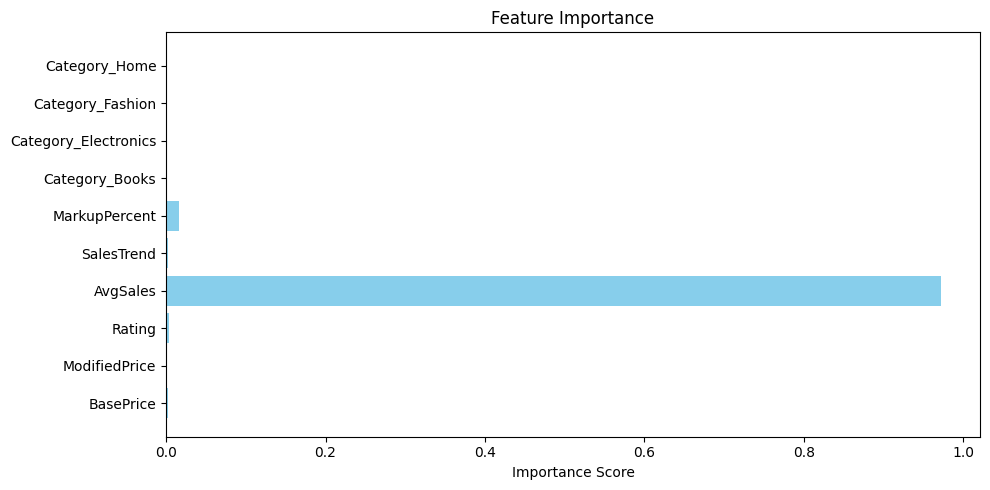

In [11]:
import matplotlib.pyplot as plt

# Feature importance
importances = model.feature_importances_
feature_names = X.columns
plt.figure(figsize=(10, 5))
plt.barh(feature_names, importances, color='skyblue')
plt.title("Feature Importance")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()
